# Data Analysis, Visualization & Match Results Prediction of Manchester United in Premier League

Group Members: Qing Peng, Ran Qin, Qiangqiang Zhang, Zhang Zhang, Eshwari Bhide

## I. Data Preparation

### Import Necessary Libraries

In [137]:
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load the dataset

In [138]:
# 2021/2022 Season DataFrame EPL_df
df = pd.read_csv('data/E0-21-22.csv')
df   # 380 rows, 106 columns

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,22/05/2022,16:00,Crystal Palace,Man United,1,0,H,1,0,...,2.04,0.25,1.68,2.15,1.74,2.23,1.88,2.25,1.74,2.16
376,E0,22/05/2022,16:00,Leicester,Southampton,4,1,H,0,0,...,2.63,-0.75,1.83,2.07,1.88,2.03,1.94,2.26,1.87,2.01
377,E0,22/05/2022,16:00,Liverpool,Wolves,3,1,H,1,1,...,3.28,-2.50,2.02,1.77,2.06,1.83,2.19,1.99,2.07,1.80
378,E0,22/05/2022,16:00,Man City,Aston Villa,3,2,H,0,1,...,3.36,-2.25,2.06,1.84,2.05,1.86,2.09,2.03,2.01,1.87


### Observation and Analysis (eg. statistics)

In [139]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,379.000000,379.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.513158,1.305263,0.681579,0.589474,13.847368,11.736842,4.678947,4.142105,10.055263,10.157895,...,2.070053,-0.248026,1.933193,1.966069,1.951105,1.975447,2.021211,2.054711,1.926868,1.958500
std,1.326545,1.258836,0.832187,0.808853,5.661784,5.348460,2.600402,2.589978,3.444180,3.718501,...,0.404372,0.950713,0.104168,0.099308,0.105294,0.106912,0.113965,0.111772,0.093221,0.094822
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,...,1.480000,-2.750000,1.650000,1.700000,1.660000,1.720000,1.800000,1.820000,1.700000,1.750000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,8.000000,3.000000,2.000000,8.000000,7.000000,...,1.780000,-0.750000,1.855000,1.900000,1.870000,1.907500,1.940000,1.960000,1.850000,1.890000
50%,1.000000,1.000000,0.000000,0.000000,13.500000,11.000000,4.000000,4.000000,10.000000,10.000000,...,1.990000,-0.250000,1.940000,1.970000,1.950000,1.970000,2.010000,2.050000,1.925000,1.955000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,15.000000,6.000000,6.000000,12.000000,12.250000,...,2.230000,0.250000,2.020000,2.050000,2.020000,2.050000,2.100000,2.140000,2.000000,2.040000
max,7.000000,6.000000,4.000000,4.000000,31.000000,31.000000,15.000000,14.000000,22.000000,25.000000,...,3.780000,2.500000,2.150000,2.200000,2.260000,2.380000,2.850000,2.520000,2.150000,2.230000


In [140]:
df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [141]:
df.dtypes

Div          object
Date         object
Time         object
HomeTeam     object
AwayTeam     object
             ...   
PCAHA       float64
MaxCAHH     float64
MaxCAHA     float64
AvgCAHH     float64
AvgCAHA     float64
Length: 106, dtype: object

In [142]:
# 2012/2013 Season DataFrame EPL_df
df_2012 = pd.read_csv('data/E0-12-13.csv')
len(df_2012.columns)

74

In [143]:
# 2013/2014 Season DataFrame EPL_df
df_2013 = pd.read_csv('data/E0-13-14.csv')
len(df_2013.columns)

68

**Our observation**: We find that the past 15 seasons's dataframe have different number of columns, so we need to find columns shared by the 15 dataframes

In [144]:
# csv List 
csv_lst = ['E0-07-08.csv', 'E0-08-09.csv', 'E0-09-10.csv', 'E0-10-11.csv', 'E0-11-12.csv', 'E0-12-13.csv', 
           'E0-13-14.csv', 'E0-14-15.csv', 'E0-15-16.csv', 'E0-16-17.csv', 'E0-17-18.csv', 
           'E0-18-19.csv', 'E0-19-20.csv', 'E0-20-21.csv', 'E0-21-22.csv']
for i in range(len(csv_lst)):
    csv_lst[i] = 'data/' + csv_lst[i]

df_ = pd.read_csv(csv_lst[0])
common_columns = set(df_.columns)
for csv in csv_lst[1:]:
    common_columns = common_columns.intersection(set(pd.read_csv(csv).columns))

len(common_columns)

38

In [145]:
df__ = pd.read_csv(csv_lst[-1])
count = 0
intersection_columns = []
for col in df__.columns:
    if col in common_columns:
        count += 1
        # make common_columns in correct order 
        intersection_columns.append(col)
count

38

In [146]:
intersection_columns

['Div',
 'Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HTR',
 'Referee',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA']

### Description and meaning for each columns 

Ref: https://www.football-data.co.uk/notes.txt

- Key to results data:

Div = League Division

Date = Match Date (dd/mm/yy)

HomeTeam = Home Team

AwayTeam = Away Team

FTHG = Full Time Home Team Goals  

FTAG = Full Time Away Team Goals  

FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win) (result)

HTHG = Half Time Home Team Goals

HTAG = Half Time Away Team Goals

HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

- Match Statistics

Referee = Referee

HS = Home Team Shots

AS = Away Team Shots

HST = Home Team Shots on Target

AST = Away Team Shots on Target

HF = Home Team Fouls Committed

AF = Away Team Fouls Committed

HC = Home Team Corners

AC = Away Team Corners

HY = Home Team Yellow Cards

AY = Away Team Yellow Cards

HR = Home Team Red Cards

AR = Away Team Red Cards


we can simply ignore the other intersection columns like B365H (Bet365 home win odds) and the columns after them since they are betting odds data. We also don't care about the HTR, Referee and Div, just ignore them.

### Determine the columns to be kept that relate to the match statistics and results

In [147]:
kept_columns = intersection_columns[:23]
kept_columns.remove('HTR')
kept_columns.remove('Referee')
kept_columns.remove('Div')
kept_columns

['Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR']

In [148]:
df = pd.read_csv('data/E0-21-22.csv')
df = df[kept_columns]
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,8,22,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,16,10,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,14,14,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,13,4,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,14,6,6,3,13,15,6,8,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,22/05/2022,Crystal Palace,Man United,1,0,H,1,0,6,10,3,4,12,22,3,6,2,4,0,0
376,22/05/2022,Leicester,Southampton,4,1,H,0,0,12,7,6,2,10,5,3,3,0,1,0,0
377,22/05/2022,Liverpool,Wolves,3,1,H,1,1,29,7,8,5,6,3,5,3,1,0,0,0
378,22/05/2022,Man City,Aston Villa,3,2,H,0,1,24,4,5,2,5,11,13,1,0,1,0,0


In [149]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.513158,1.305263,0.681579,0.589474,13.847368,11.736842,4.678947,4.142105,10.055263,10.157895,5.602632,4.821053,1.652632,1.744737,0.050000,0.063158
std,1.326545,1.258836,0.832187,0.808853,5.661784,5.348460,2.600402,2.589978,3.444180,3.718501,3.029755,2.735399,1.258373,1.230912,0.230005,0.243567
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,8.000000,3.000000,2.000000,8.000000,7.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.500000,11.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000,1.500000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,15.000000,6.000000,6.000000,12.000000,12.250000,7.000000,7.000000,2.000000,3.000000,0.000000,0.000000
max,7.000000,6.000000,4.000000,4.000000,31.000000,31.000000,15.000000,14.000000,22.000000,25.000000,15.000000,13.000000,6.000000,5.000000,2.000000,1.000000


In [150]:
df.dtypes

Date        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HS           int64
AS           int64
HST          int64
AST          int64
HF           int64
AF           int64
HC           int64
AC           int64
HY           int64
AY           int64
HR           int64
AR           int64
dtype: object

In [151]:
df.isnull().sum() # no missing values

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

---
## II. Data Visualization Part - Attack vs Defense between Liverpool and ManU

### Data Cleaning and preprocessing

In [152]:
columns_to_keep = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST']
EPL_df = df[columns_to_keep]
EPL_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST
0,13/08/2021,Brentford,Arsenal,2,0,H,8,22,3,4
1,14/08/2021,Man United,Leeds,5,1,H,16,10,8,3
2,14/08/2021,Burnley,Brighton,1,2,A,14,14,3,8
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,13,4,6,1
4,14/08/2021,Everton,Southampton,3,1,H,14,6,6,3
...,...,...,...,...,...,...,...,...,...,...
375,22/05/2022,Crystal Palace,Man United,1,0,H,6,10,3,4
376,22/05/2022,Leicester,Southampton,4,1,H,12,7,6,2
377,22/05/2022,Liverpool,Wolves,3,1,H,29,7,8,5
378,22/05/2022,Man City,Aston Villa,3,2,H,24,4,5,2


- Prepare dataframe of Engliand Premier Big 5 team in the past 15 seasons 

In [153]:
ManU_df_15seasons = []
Liverp_df_15seasons = []
Arsen_df_15seasons = []
Chels_df_15seasons = []
ManC_df_15seasons = []

def data_clean(csv, season):
    """
    Return new dataframes of five teams covering their 15 seasons England Premier League data 
    with new columns name and new Season column.
    """
    
    # Loading Data
    df = pd.read_csv(csv)
    columns_to_keep = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST']
    
    # England Premier League DataFrame
    EPL_df = df[columns_to_keep].copy()
    EPL_df.loc[:, 'Season'] = season
    EPL_df.loc[:, 'Games_Played'] = 1
    EPL_df.rename(
        columns={
            'FTHG':'Home_Goals_Scored', 
            'FTAG':'Away_Goals_Scored',
            'FTR':'Full_Time_Result',
            'HS':'Home_Shots',
            'AS':'Away_Shots',
            'HST':'Home_Shots_On_Target', 
            'AST':'Away_Shots_On_Target' 
        }, 
        inplace=True
        )
    
    # Five Teams DataFrames of Each Season
    ManU_df = EPL_df[(EPL_df['HomeTeam'] == 'Man United') | (EPL_df['AwayTeam'] == 'Man United')] 
    Liverp_df = EPL_df[(EPL_df['HomeTeam'] == 'Liverpool') | (EPL_df['AwayTeam'] == 'Liverpool')]
    Arsen_df = EPL_df[(EPL_df['HomeTeam'] == 'Arsenal') | (EPL_df['AwayTeam'] == 'Arsenal')]
    Chels_df = EPL_df[(EPL_df['HomeTeam'] == 'Chelsea') | (EPL_df['AwayTeam'] == 'Chelsea')]
    ManC_df = EPL_df[(EPL_df['HomeTeam'] == 'Man City') | (EPL_df['AwayTeam'] == 'Man City')] 
    
    # Appending Datasets to Obtain 15 Seasons' DataFrame Lists of Five Teams
    ManU_df_15seasons.append(ManU_df)
    Liverp_df_15seasons.append(Liverp_df)
    Arsen_df_15seasons.append(Arsen_df)
    Chels_df_15seasons.append(Chels_df) 
    ManC_df_15seasons.append(ManC_df)
    
    return ManU_df_15seasons, Liverp_df_15seasons, Arsen_df_15seasons, Chels_df_15seasons, ManC_df_15seasons

In [154]:
# csv List and Season List
csv_lst = ['E0-07-08.csv', 'E0-08-09.csv', 'E0-09-10.csv', 'E0-10-11.csv', 'E0-11-12.csv', 'E0-12-13.csv', 
           'E0-13-14.csv', 'E0-14-15.csv', 'E0-15-16.csv', 'E0-16-17.csv', 'E0-17-18.csv', 
           'E0-18-19.csv', 'E0-19-20.csv', 'E0-20-21.csv', 'E0-21-22.csv']
for i in range(len(csv_lst)):
    csv_lst[i] = 'data/' + csv_lst[i]
    
season_lst = ['07/08', '08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', 
              '17/18', '18/19', '19/20', '20/21', '21/22']

# Calling data_clean Function
for csv, season in zip(csv_lst, season_lst): 
    data_clean(csv, season)

# Concatenating Objects to Obtain 15 Seasons' DataFrames of Five Teams
ManU = pd.concat(ManU_df_15seasons)
Liverp = pd.concat(Liverp_df_15seasons)
Arsen = pd.concat(Arsen_df_15seasons)
Chels = pd.concat(Chels_df_15seasons)
ManC = pd.concat(ManC_df_15seasons)

In [155]:
ManU

,HomeTeam,AwayTeam,Home_Goals_Scored,Away_Goals_Scored,Full_Time_Result,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Season,Games_Played
9,Man United,Reading,0.0,0.0,D,22.0,3.0,9.0,2.0,07/08,1
14,Portsmouth,Man United,1.0,1.0,D,7.0,20.0,6.0,12.0,07/08,1
26,Man City,Man United,1.0,0.0,H,6.0,15.0,2.0,6.0,07/08,1
35,Man United,Tottenham,1.0,0.0,H,14.0,10.0,5.0,3.0,07/08,1
40,Man United,Sunderland,1.0,0.0,H,17.0,4.0,9.0,1.0,07/08,1
...,...,...,...,...,...,...,...,...,...,...,...
321,Arsenal,Man United,3.0,1.0,H,14.0,14.0,7.0,5.0,21/22,1
331,Man United,Chelsea,1.0,1.0,D,6.0,21.0,3.0,6.0,21/22,1
341,Man United,Brentford,3.0,0.0,H,9.0,12.0,5.0,4.0,21/22,1
346,Brighton,Man United,4.0,0.0,H,17.0,15.0,6.0,5.0,21/22,1


- Convert FullTimeResults(H, D, A) to the PointsPerGame (0, 1, 3) for each team

In [156]:
def convert_results_to_points(team_df, team_name):
    """
    Return updated dataframes of 5 teams with Points column instead of Full_Time_Result. 
    Parameter team_df can be ManU, Liverp, Arsen, Chels, ManC.
    The corresponding team_name are 'Man United', 'Liverpool', 'Arsenal', 'Chelsea', 'Man City'.
    """
    
    mask_H = (team_df.HomeTeam == team_name) & (team_df.Full_Time_Result == 'H') 
    team_df.loc[mask_H, 'Full_Time_Result'] = 3
    mask_A = (team_df.AwayTeam == team_name) & (team_df.Full_Time_Result == 'A') 
    team_df.loc[mask_A, 'Full_Time_Result'] = 3
    mask_D = team_df.Full_Time_Result == 'D'
    team_df.loc[mask_D, 'Full_Time_Result'] = 1
    mask_L = ((team_df.HomeTeam == team_name) & (team_df.Full_Time_Result == 'A')) | ((team_df.AwayTeam == team_name) & (team_df.Full_Time_Result == 'H'))
    team_df.loc[mask_L, 'Full_Time_Result'] = 0
    team_df.rename(
        columns={
            'Full_Time_Result':'Points' 
        }, 
        inplace=True
        )
    
    return team_df


ManU = convert_results_to_points(ManU, 'Man United')
Liverp = convert_results_to_points(Liverp, 'Liverpool')
Arsen = convert_results_to_points(Arsen, 'Arsenal')
Chels = convert_results_to_points(Chels, 'Chelsea')
ManC = convert_results_to_points(ManC, 'Man City')

In [157]:
ManU

,HomeTeam,AwayTeam,Home_Goals_Scored,Away_Goals_Scored,Points,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Season,Games_Played
9,Man United,Reading,0.0,0.0,1,22.0,3.0,9.0,2.0,07/08,1
14,Portsmouth,Man United,1.0,1.0,1,7.0,20.0,6.0,12.0,07/08,1
26,Man City,Man United,1.0,0.0,0,6.0,15.0,2.0,6.0,07/08,1
35,Man United,Tottenham,1.0,0.0,3,14.0,10.0,5.0,3.0,07/08,1
40,Man United,Sunderland,1.0,0.0,3,17.0,4.0,9.0,1.0,07/08,1
...,...,...,...,...,...,...,...,...,...,...,...
321,Arsenal,Man United,3.0,1.0,0,14.0,14.0,7.0,5.0,21/22,1
331,Man United,Chelsea,1.0,1.0,1,6.0,21.0,3.0,6.0,21/22,1
341,Man United,Brentford,3.0,0.0,3,9.0,12.0,5.0,4.0,21/22,1
346,Brighton,Man United,4.0,0.0,0,17.0,15.0,6.0,5.0,21/22,1


- Add additional two columns Home & Away_Goals_Conceded

In [158]:
def data_transformation(team_df, team_name):
    """
    Return updated dataframes of 5 teams with two added columns Home/Away_Goals_Conceded and 
    convert other team's Away/Home_Goals_Scored, Away/Home_Shots, Away/Home_Shots_On_Target to NaN. 
    Parameter team_df can be ManU, Liverp, Arsen, Chels, ManC.
    The corresponding team_name are 'Man United', 'Liverpool', 'Arsenal', 'Chelsea', 'Man City'.
    """    
    
    team_df.reset_index(inplace=True)

    
    # Adding two empty columns to dataframes
    team_df['Home_Goals_Conceded'] = 0
    team_df['Away_Goals_Conceded'] = 0

    # Getting each team's Away/Home_Goals_Conceded
    # converting other team's Away/Home_Goals_Scored, Away/Home_Shots, Away/Home_Shots_On_Target to NaN 
    for i in team_df.index:
        if team_df.iloc[i]['HomeTeam'] == team_name: 
            team_df.at[i, 'Home_Goals_Conceded'] = team_df.iloc[i]['Away_Goals_Scored']
            team_df.at[i, 'Away_Goals_Scored'] = 0
            team_df.at[i, 'Away_Shots'] = 0
            team_df.at[i, 'Away_Shots_On_Target'] = 0
        if  team_df.iloc[i]['AwayTeam'] == team_name: 
            team_df.at[i, 'Away_Goals_Conceded'] = team_df.iloc[i]['Home_Goals_Scored']
            team_df.at[i, 'Home_Goals_Scored'] = 0
            team_df.at[i, 'Home_Shots'] = 0
            team_df.at[i, 'Home_Shots_On_Target'] = 0
            
    del team_df['index']
    
    
        
    columns_to_integer = ['Home_Goals_Scored', 'Away_Goals_Scored', 'Points', 'Home_Shots', 'Away_Shots',
                          'Home_Shots_On_Target', 'Away_Shots_On_Target']
    team_df[columns_to_integer] =  team_df[columns_to_integer].astype('Int64')
            
    return team_df


ManU = data_transformation(ManU, 'Man United')
Liverp = data_transformation(Liverp, 'Liverpool')
Arsen = data_transformation(Arsen, 'Arsenal')
Chels = data_transformation(Chels, 'Chelsea')
ManC = data_transformation(ManC, 'Man City')

In [159]:
ManU

,HomeTeam,AwayTeam,Home_Goals_Scored,Away_Goals_Scored,Points,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Season,Games_Played,Home_Goals_Conceded,Away_Goals_Conceded
0,Man United,Reading,0,0,1,22,0,9,0,07/08,1,0,0
1,Portsmouth,Man United,0,1,1,0,20,0,12,07/08,1,0,1
2,Man City,Man United,0,0,0,0,15,0,6,07/08,1,0,1
3,Man United,Tottenham,1,0,3,14,0,5,0,07/08,1,0,0
4,Man United,Sunderland,1,0,3,17,0,9,0,07/08,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,Arsenal,Man United,0,1,0,0,14,0,5,21/22,1,0,3
557,Man United,Chelsea,1,0,1,6,0,3,0,21/22,1,1,0
558,Man United,Brentford,3,0,3,9,0,5,0,21/22,1,0,0
559,Brighton,Man United,0,0,0,0,15,0,5,21/22,1,0,4


#### 1. Line Plots: Total points of Big 5 in the past 15 seasons

In [160]:
ManU_Analysis = ManU.groupby(['Season']).sum()
Arsen_Analysis = Arsen.groupby(['Season']).sum()
ManC_Analysis = ManC.groupby(['Season']).sum()
Liverp_Analysis = Liverp.groupby(['Season']).sum()
Chels_Analysis = Chels.groupby(['Season']).sum()

In [161]:
ManU_Analysis.reset_index(inplace=True)
Arsen_Analysis.reset_index(inplace=True)
ManC_Analysis.reset_index(inplace=True)
Liverp_Analysis.reset_index(inplace=True)
Chels_Analysis.reset_index(inplace=True)

In [162]:
x = ManU_Analysis['Season'].values
x_pos = np.arange(len(ManU_Analysis['Season']))
x_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [163]:
ManU_Analysis

,Season,Home_Goals_Scored,Away_Goals_Scored,Points,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Games_Played,Home_Goals_Conceded,Away_Goals_Conceded
0,07/08,47,33,87,353,267,209,144,38,7,15
1,08/09,43,25,90,351,270,217,159,38,13,11
2,09/10,52,34,85,343,273,195,149,38,12,16
3,10/11,49,29,80,312,231,184,126,38,12,25
4,11/12,52,37,89,370,222,228,141,38,19,14
5,12/13,45,41,89,280,232,163,136,38,19,24
6,13/14,29,35,64,301,224,102,79,38,21,22
7,14/15,41,21,70,282,227,104,75,38,15,22
8,15/16,27,22,66,248,182,75,68,38,9,26
9,16/17,26,28,69,337,252,118,92,38,12,17


In [164]:
np.array(ManC_Analysis['Points'].values)

array([55, 50, 67, 71, 89, 78, 86, 79, 66, 78, 100, 98, 57, 86, 93],
      dtype=object)

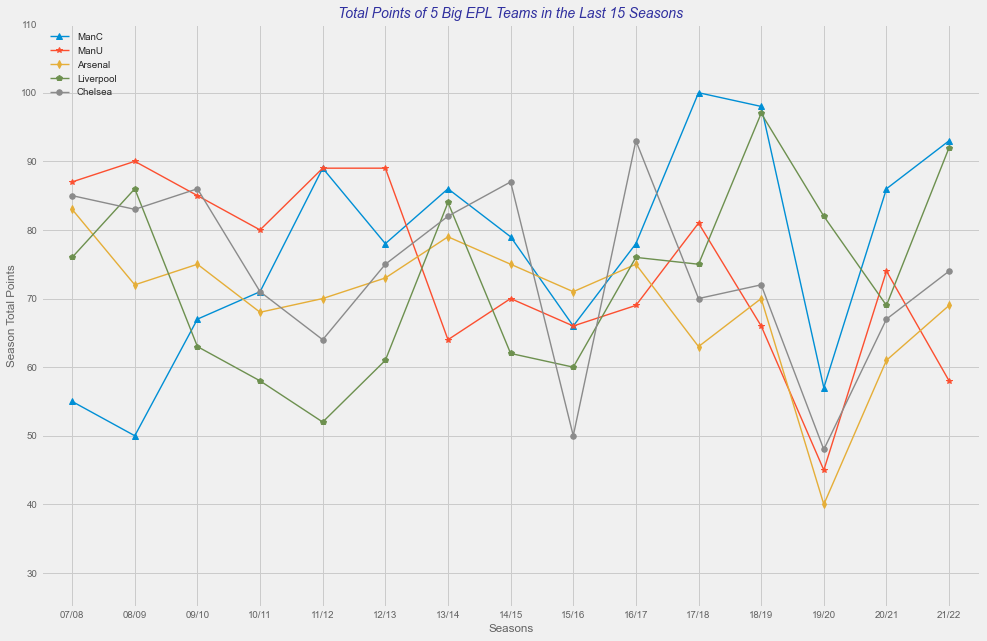

In [165]:
# Line Plots: Total Points of Five Teams in the past 15 seasons

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(15, 10))

Analysis_df_lst = [ManC_Analysis, ManU_Analysis, Arsen_Analysis, Liverp_Analysis, Chels_Analysis]

marker_lst = ['^', '*', 'd', 'p', 'o']
i = 0
while i < len(marker_lst):
    for df in Analysis_df_lst:
        plt.plot(x_pos, np.array(df['Points'].values), marker=marker_lst[i], linewidth=1.4, markersize=5.5)
        i = i + 1

plt.xlabel('Seasons', alpha=0.7, size='small')
plt.ylabel('Season Total Points', alpha=0.7, size='small')
plt.xticks(x_pos, x, alpha=0.7, size='x-small')
plt.yticks(alpha=0.7, size='x-small')
plt.ylim(25, 110)
plt.xlim(-0.5, 14.5)
plt.title('Total Points of 5 Big EPL Teams in the Last 15 Seasons', alpha=0.8, color='Darkblue',
           style='italic', fontsize='medium')
plt.legend(['ManC', 'ManU', 'Arsenal', 'Liverpool', 'Chelsea'], loc=2, frameon=False, fontsize='x-small')

plt.savefig('TotalPts_5Big.png')
plt.show()

#### 2. Horizontal Bar Chart: Man United Goals Conceded and Scored When Playing at Home and Away


In [166]:
ManU_Analysis['Away_Goals_Conceded'] *= -1
ManU_Analysis['Home_Goals_Conceded'] *= -1
Liverp_Analysis['Away_Goals_Conceded'] *= -1
Liverp_Analysis['Home_Goals_Conceded'] *= -1

In [167]:
ManU_Analysis

,Season,Home_Goals_Scored,Away_Goals_Scored,Points,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Games_Played,Home_Goals_Conceded,Away_Goals_Conceded
0,07/08,47,33,87,353,267,209,144,38,-7,-15
1,08/09,43,25,90,351,270,217,159,38,-13,-11
2,09/10,52,34,85,343,273,195,149,38,-12,-16
3,10/11,49,29,80,312,231,184,126,38,-12,-25
4,11/12,52,37,89,370,222,228,141,38,-19,-14
5,12/13,45,41,89,280,232,163,136,38,-19,-24
6,13/14,29,35,64,301,224,102,79,38,-21,-22
7,14/15,41,21,70,282,227,104,75,38,-15,-22
8,15/16,27,22,66,248,182,75,68,38,-9,-26
9,16/17,26,28,69,337,252,118,92,38,-12,-17


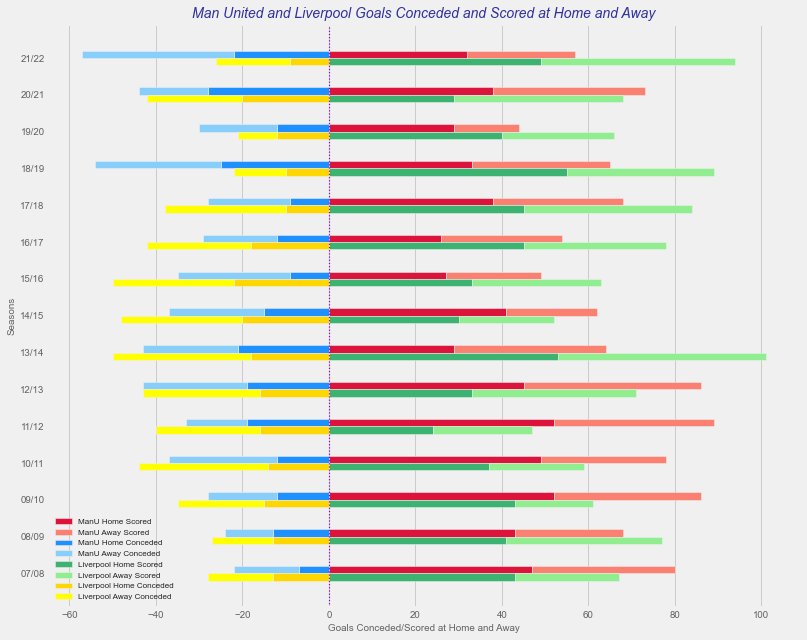

In [168]:
fig = plt.figure(figsize=(12, 10))
plt.barh(x_pos + 0.1, ManU_Analysis['Home_Goals_Scored'].values, height=0.2, color='crimson')
plt.barh(x_pos + 0.1, ManU_Analysis['Away_Goals_Scored'].values, height=0.2, 
         left=ManU_Analysis['Home_Goals_Scored'].values, color='salmon')
plt.barh(x_pos + 0.1, ManU_Analysis['Home_Goals_Conceded'].values, height=0.2, color='dodgerblue')
plt.barh(x_pos + 0.1, ManU_Analysis['Away_Goals_Conceded'].values, height=0.2, 
         left=ManU_Analysis['Home_Goals_Conceded'].values, color='lightskyblue')


plt.barh(x_pos - 0.1, Liverp_Analysis['Home_Goals_Scored'].values, height=0.2, color='mediumseagreen')
plt.barh(x_pos - 0.1 , Liverp_Analysis['Away_Goals_Scored'].values, height=0.2, 
         left=Liverp_Analysis['Home_Goals_Scored'].values, color='lightgreen')
plt.barh(x_pos - 0.1, Liverp_Analysis['Home_Goals_Conceded'].values, height=0.2, color='gold')
plt.barh(x_pos - 0.1, Liverp_Analysis['Away_Goals_Conceded'].values, height=0.2, 
         left=Liverp_Analysis['Home_Goals_Conceded'].values, color='yellow')


plt.title('Man United and Liverpool Goals Conceded and Scored at Home and Away', alpha=0.8, color='Darkblue',
            style='italic', fontsize='medium')
plt.xlabel('Goals Conceded/Scored at Home and Away', alpha=0.7, size='x-small')
plt.ylabel('Seasons', alpha=0.7, size='x-small')
plt.yticks(x_pos, x, alpha=0.7, size='x-small')
plt.xticks(alpha=0.7, size='x-small')
plt.legend(['ManU Home Scored', 'ManU Away Scored', 'ManU Home Conceded', 
            'ManU Away Conceded', 'Liverpool Home Scored', 'Liverpool Away Scored', 'Liverpool Home Conceded', 
            'Liverpool Away Conceded'], loc='best', frameon=False, fontsize='xx-small')
ax = plt.gca()
ax.yaxis.grid()

plt.axvline(0, linestyle='dotted', color='darkviolet', linewidth=1.2)

plt.savefig('Comp_Scored_Conceded.png')

plt.show()


#### 3. Line Chart and Bar Chart: Total Shots, Shots-on-Target, Shots Accuracy 

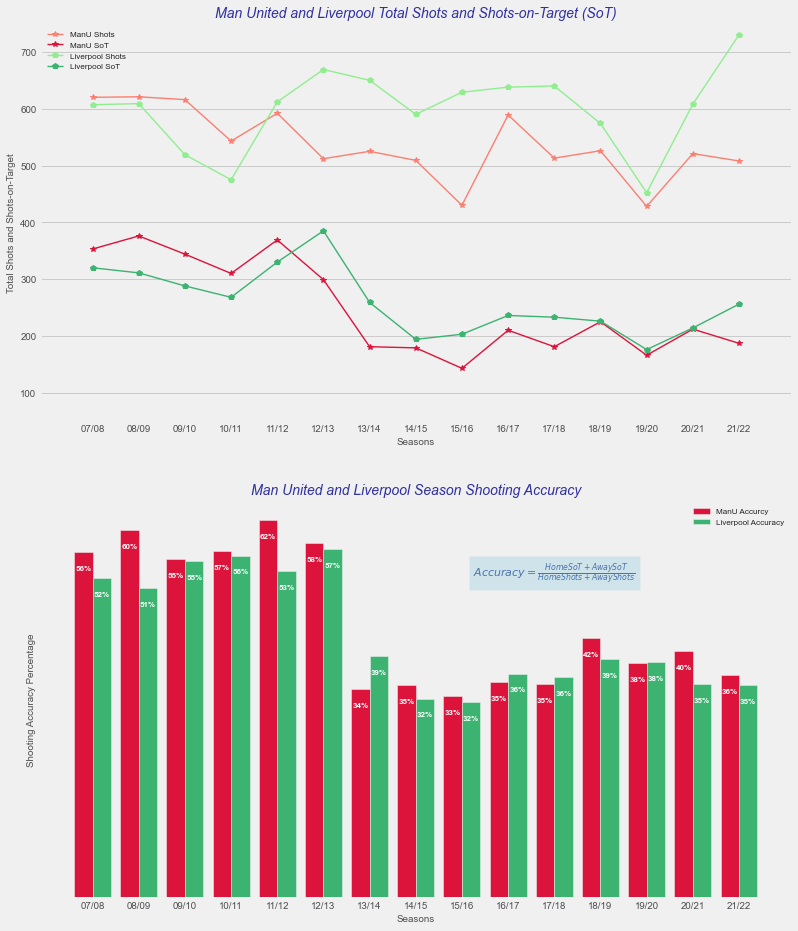

In [169]:
# Line Chart

fig = plt.figure(figsize=(12, 15))
ax1 = plt.subplot(2, 1, 1)

plt.plot(x_pos, np.array((ManU_Analysis['Home_Shots'] + ManU_Analysis['Away_Shots']).values), marker='*', 
         linewidth=1.4, markersize=5.5, color='salmon')
plt.plot(x_pos, np.array((ManU_Analysis['Home_Shots_On_Target'] + ManU_Analysis['Away_Shots_On_Target']).values), 
        marker='*', linewidth=1.4, markersize=5.5, color='crimson')
plt.plot(x_pos, np.array((Liverp_Analysis['Home_Shots'] + Liverp_Analysis['Away_Shots']).values), marker='p', 
         linewidth=1.4, markersize=5.5, color='lightgreen')
plt.plot(x_pos, np.array((Liverp_Analysis['Home_Shots_On_Target'] + Liverp_Analysis['Away_Shots_On_Target']).values),
        marker='p', linewidth=1.4, markersize=5.5, color='mediumseagreen')

plt.title('Man United and Liverpool Total Shots and Shots-on-Target (SoT)', alpha=0.8, color='Darkblue',
            style='italic', fontsize='medium')
plt.ylabel('Total Shots and Shots-on-Target', alpha=0.8, size='x-small')
plt.xlabel('Seasons', alpha=0.8, size='x-small')
plt.xticks(x_pos, x, alpha=0.8, size='x-small')
plt.yticks(alpha=0.8, size='x-small')
plt.ylim(50, 750)
plt.legend(['ManU Shots', 'ManU SoT', 'Liverpool Shots', 
            'Liverpool SoT'], loc='best', frameon=False, fontsize='xx-small')

# Only Getting Horizontal Gridlines to Appear in Line Plot
ax1 = plt.gca()
ax1.xaxis.grid()


# Bar Chart
plt.subplot(2, 1, 2, sharex=ax1)


Accuracy_ManU = ((ManU_Analysis['Home_Shots_On_Target'] + ManU_Analysis['Away_Shots_On_Target']) 
           / (ManU_Analysis['Home_Shots'] + ManU_Analysis['Away_Shots'])).values

Accuracy_Liverp = ((Liverp_Analysis['Home_Shots_On_Target'] + Liverp_Analysis['Away_Shots_On_Target']) 
           / (Liverp_Analysis['Home_Shots'] + Liverp_Analysis['Away_Shots'])).values
bars = plt.bar(x_pos - 0.2 , Accuracy_ManU * 100, width=0.4, color='crimson')
bars_lvp = plt.bar(x_pos + 0.2 , Accuracy_Liverp * 100, width=0.4, color='mediumseagreen')


plt.title('Man United and Liverpool Season Shooting Accuracy', alpha=0.8, color='Darkblue',
            style='italic', fontsize='medium')
plt.ylabel('Shooting Accuracy Percentage', alpha=0.8, size='x-small')
plt.xlabel('Seasons', alpha=0.8, size='x-small')
plt.xticks(x_pos, x, alpha=0.8, size='x-small')
plt.yticks(alpha=0.8, size='x-small')
plt.legend(['ManU Accurcy', 'Liverpool Accuracy'], loc=1, frameon=False, fontsize='xx-small')

plt.text(10, 53, r'$Accuracy = \frac{HomeSoT + AwaySoT}{HomeShots + AwayShots}$',
        horizontalalignment='center', fontsize=11, color='b', bbox=dict(facecolor='lightblue', alpha=0.5))

# Remove the horizontal and vertical grids
ax2 = plt.gca()
ax2.xaxis.grid()
ax2.yaxis.grid()

# Direct Label Each Bar with Y axis values
for bar in bars:
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 3, str(int(bar.get_height())) 
            + '%', ha='center', color='w',fontsize=8, fontweight='semibold')
    
for bar in bars_lvp:
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 3, str(int(bar.get_height())) 
            + '%', ha='center', color='w',fontsize=8, fontweight='semibold')

# Remove All the Ticks (Both Axes), and Tick Labels on the Y Axis    
plt.tick_params(top=False, bottom=False, left=False, right=False, 
                labelleft=False, labelbottom=True)  

plt.savefig('Comp_TotalShots_SoT_Accuracy.png')

---
## III. Machine Learning Part

### Data Cleaning and Preprocessing for Machine Learning and Missing Values Handling

We use all teams data in the past 15 seasons to train the models

In [311]:
pd.read_csv('data/E0-14-15.csv') # have empty row in dataset

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,16/08/14,Arsenal,Crystal Palace,2.0,1.0,H,1.0,1.0,D,...,2.10,24.0,-1.50,1.81,1.78,2.20,2.10,1.29,5.90,12.75
1,E0,16/08/14,Leicester,Everton,2.0,2.0,D,1.0,2.0,A,...,1.80,22.0,0.25,1.88,1.85,2.10,2.02,3.11,3.40,2.47
2,E0,16/08/14,Man United,Swansea,1.0,2.0,A,0.0,1.0,A,...,2.13,25.0,-1.50,2.18,2.08,1.87,1.79,1.45,4.81,8.25
3,E0,16/08/14,QPR,Hull,0.0,1.0,A,0.0,0.0,D,...,1.58,24.0,0.00,1.80,1.73,2.25,2.14,2.31,3.24,3.59
4,E0,16/08/14,Stoke,Aston Villa,0.0,1.0,A,0.0,0.0,D,...,1.60,23.0,-0.50,1.95,1.91,2.02,1.96,2.01,3.34,4.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,E0,24/05/15,Leicester,QPR,5.0,1.0,H,2.0,0.0,H,...,2.41,28.0,-1.00,1.98,1.93,1.98,1.93,1.53,4.94,6.13
377,E0,24/05/15,Man City,Southampton,2.0,0.0,H,1.0,0.0,H,...,2.66,28.0,-1.00,2.00,1.94,2.03,1.93,1.60,4.35,6.00
378,E0,24/05/15,Newcastle,West Ham,2.0,0.0,H,0.0,0.0,D,...,2.25,25.0,-0.50,1.82,1.78,2.20,2.10,1.76,4.01,4.98
379,E0,24/05/15,Stoke,Liverpool,6.0,1.0,H,5.0,0.0,H,...,1.99,25.0,0.25,2.07,2.02,1.88,1.85,3.56,3.60,2.17


In [312]:
matches_22seasons = []

def data_clean_ml(csv, season, columns_to_keep):
    """
    Return new dataframes of all teams covering their 22 seasons England Premier League data 
    with new columns name and new Season column.
    """
    
    # Loading Data and remove the empty row
    df = pd.read_csv(csv, on_bad_lines='skip', encoding_errors='ignore').dropna(axis=0,how='all')
    
    # England Premier League DataFrame
    EPL_df = df[columns_to_keep].copy()
    EPL_df.loc[:, 'Season'] = season
    EPL_df.loc[:, 'Games_Played'] = 1
    EPL_df.rename(
        columns={
            'FTHG':'Home_Full_Time_Goals_Scored', 
            'FTAG':'Away_Full_Time_Goals_Scored',
            'FTR':'Full_Time_Result',
            'HTHG':'Home_Half_Time_Goal_Scored',
            'HTAG':'Away_Half_Time_Goals_Scored',
            'HS':'Home_Shots',
            'AS':'Away_Shots',
            'HST':'Home_Shots_On_Target', 
            'AST':'Away_Shots_On_Target',
            'HF':'Home_Fouls_Committed',
            'AF':'Away_Fouls_Committed', 
            'HC':'Home_Corners',
            'AC':'Away_Corners',
            'HY':'Home_Yellow_Cards',
            'AY':'Away_Yellow_Cards',
            'HR':'Home_Red_Cards',
            'AR':'Away_Red_Cards'
        }, 
        inplace=True
        )
    
    # Appending Datasets to Obtain 15 Seasons' DataFrame 
    matches_22seasons.append(EPL_df)
    
    return matches_22seasons


# csv List and Season List
csv_lst = ['0001.csv', '0102.csv', '0203.csv', '0304.csv', '0405.csv', '0506.csv', '0607.csv', 'E0-07-08.csv', 'E0-08-09.csv', 'E0-09-10.csv', 'E0-10-11.csv', 'E0-11-12.csv', 'E0-12-13.csv', 
           'E0-13-14.csv', 'E0-14-15.csv', 'E0-15-16.csv', 'E0-16-17.csv', 'E0-17-18.csv', 
           'E0-18-19.csv', 'E0-19-20.csv', 'E0-20-21.csv', 'E0-21-22.csv']
for i in range(len(csv_lst)):
    csv_lst[i] = 'data/' + csv_lst[i]
    
season_lst = ['00/01', '01/02', '02/03', '03/04', '05/06', '06/07', '07/08', '08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', 
              '17/18', '18/19', '19/20', '20/21', '21/22']

# Calling data_clean Function
for csv, season in zip(csv_lst, season_lst): 
    data_clean_ml(csv, season, kept_columns)
    
all_matches = pd.concat(matches_22seasons)
all_matches.reset_index(inplace=True)
    
all_matches = all_matches.drop(['index'], axis=1)
all_matches

,Date,HomeTeam,AwayTeam,Home_Full_Time_Goals_Scored,Away_Full_Time_Goals_Scored,Full_Time_Result,Home_Half_Time_Goal_Scored,Away_Half_Time_Goals_Scored,Home_Shots,Away_Shots,...,Home_Fouls_Committed,Away_Fouls_Committed,Home_Corners,Away_Corners,Home_Yellow_Cards,Away_Yellow_Cards,Home_Red_Cards,Away_Red_Cards,Season,Games_Played
0,19/08/00,Charlton,Man City,4.0,0.0,H,2.0,0.0,17.0,8.0,...,13.0,12.0,6.0,6.0,1.0,2.0,0.0,0.0,00/01,1
1,19/08/00,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,17.0,12.0,...,19.0,14.0,7.0,7.0,1.0,2.0,0.0,0.0,00/01,1
2,19/08/00,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,6.0,16.0,...,15.0,21.0,8.0,4.0,5.0,3.0,1.0,0.0,00/01,1
3,19/08/00,Derby,Southampton,2.0,2.0,D,1.0,2.0,6.0,13.0,...,11.0,13.0,5.0,8.0,1.0,1.0,0.0,0.0,00/01,1
4,19/08/00,Leeds,Everton,2.0,0.0,H,2.0,0.0,17.0,12.0,...,21.0,20.0,6.0,4.0,1.0,3.0,0.0,0.0,00/01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,23/05/2021,Liverpool,Crystal Palace,2.0,0.0,H,1.0,0.0,19.0,5.0,...,10.0,8.0,14.0,1.0,2.0,2.0,0.0,0.0,21/22,1
7794,23/05/2021,Man City,Everton,5.0,0.0,H,2.0,0.0,21.0,8.0,...,8.0,10.0,7.0,5.0,2.0,2.0,0.0,0.0,21/22,1
7795,23/05/2021,Sheffield United,Burnley,1.0,0.0,H,1.0,0.0,12.0,10.0,...,11.0,1.0,8.0,9.0,3.0,1.0,0.0,0.0,21/22,1
7796,23/05/2021,West Ham,Southampton,3.0,0.0,H,2.0,0.0,14.0,17.0,...,5.0,9.0,2.0,3.0,0.0,3.0,0.0,0.0,21/22,1


- Convert the full time result ('H', 'A', 'D') to number (1, -1, 0)

In [313]:
def convert_full_time_result_to_number(match):
    if match['Full_Time_Result'] == 'H':
        return 1
    elif match['Full_Time_Result'] == 'A':
        return -1
    else:
        return 0

all_matches['Result'] = all_matches.apply(lambda match: convert_full_time_result_to_number(match), axis=1)

In [314]:
all_matches.to_csv('all_matches_22.csv')

In [315]:
all_matches.isnull().sum()

Date                           0
HomeTeam                       0
AwayTeam                       0
Home_Full_Time_Goals_Scored    0
Away_Full_Time_Goals_Scored    0
Full_Time_Result               0
Home_Half_Time_Goal_Scored     0
Away_Half_Time_Goals_Scored    0
Home_Shots                     0
Away_Shots                     0
Home_Shots_On_Target           0
Away_Shots_On_Target           0
Home_Fouls_Committed           0
Away_Fouls_Committed           0
Home_Corners                   0
Away_Corners                   0
Home_Yellow_Cards              0
Away_Yellow_Cards              0
Home_Red_Cards                 0
Away_Red_Cards                 0
Season                         0
Games_Played                   0
Result                         0
dtype: int64

### Correlations between Variables Calcualtion and Feature Selection / Extraction (?) 

In [316]:
all_matches_ = all_matches.copy()

#### 1. Correlation matrix heatmap

In [317]:
feat = ['Home_Full_Time_Goals_Scored','Away_Full_Time_Goals_Scored','Home_Half_Time_Goal_Scored', 
        'Away_Half_Time_Goals_Scored','Home_Shots', 'Away_Shots', 'Home_Shots_On_Target', 
       'Away_Shots_On_Target', 'Home_Fouls_Committed', 'Away_Fouls_Committed', 
       'Home_Corners', 'Away_Corners', 'Home_Yellow_Cards', 
       'Away_Yellow_Cards', 'Home_Red_Cards', 'Away_Red_Cards', 'Result']

<AxesSubplot:>

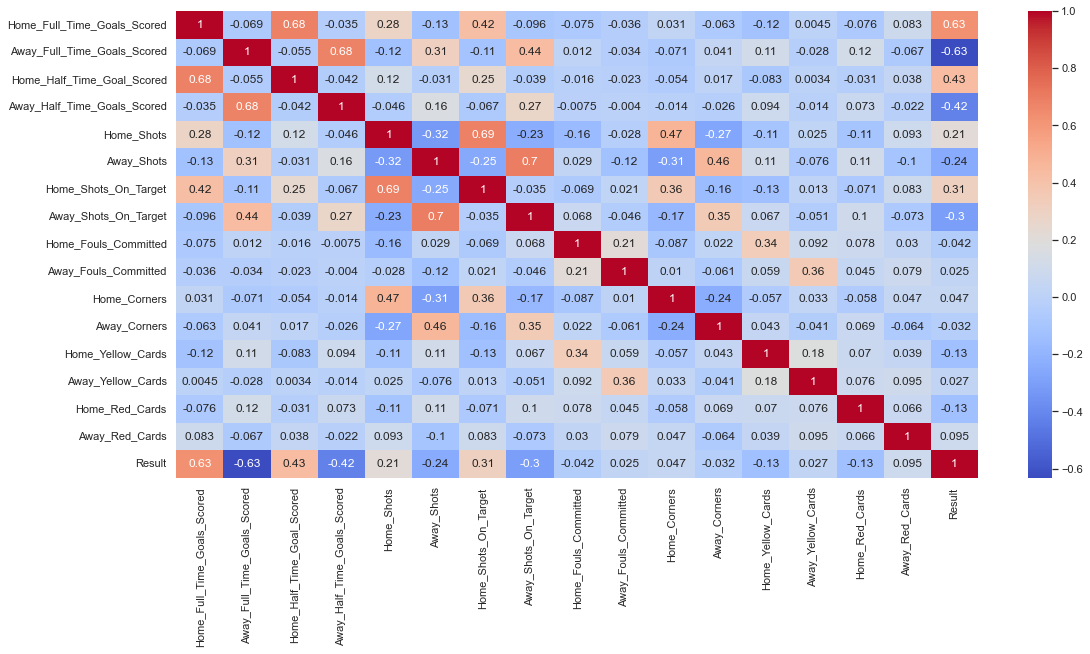

In [318]:
sns.set(rc = {'figure.figsize': (16,8)})
sns.heatmap(all_matches_.loc[:, feat].corr(), annot=True, fmt='.2g',cmap= 'coolwarm')

#### 2. Compute the correlations between each feature and the target 'Result'

In [319]:
correlation = all_matches_.loc[:, feat].corr()['Result'][:].sort_values(ascending=False).to_frame()
correlation

,Result
Result,1.000000
Home_Full_Time_Goals_Scored,0.625696
Home_Half_Time_Goal_Scored,0.433391
Home_Shots_On_Target,0.308994
Home_Shots,0.214984
Away_Red_Cards,0.094760
Home_Corners,0.047117
Away_Yellow_Cards,0.026734
Away_Fouls_Committed,0.024959
Away_Corners,-0.031888


In [179]:
#### 3. Extract two new features from the dataset that have strong correlation with the target feature 'Result'

In [180]:
# Chance /Conversion - A calculation of goals scored divided by shots attempted (excluding blocked attempts and own goals).
# all_matches_['Home_Chance_Conversion'] = all_matches_['Home_Full_Time_Goals_Scored'] \
#         / (all_matches_['Home_Shots'])
# all_matches_['Away_Chance_Conversion'] = all_matches_['Away_Full_Time_Goals_Scored'] \
#         / (all_matches_['Away_Shots'])

# correlation_new = all_matches_.loc[:, feat + ['Home_Chance_Conversion', 'Away_Chance_Conversion']].corr()['Result'][:].sort_values(ascending=False).to_frame()
# correlation_new

In [181]:
# sns.set(rc = {'figure.figsize': (16,8)})
# sns.heatmap(all_matches_.loc[:, feat + ['Home_Chance_Conversion', 'Away_Chance_Conversion']].corr(), annot=True, fmt='.2g',cmap= 'coolwarm')

In [182]:
#### 4. Drop 2 features ('Away_Yellow_Cards', 'Away_Fouls_Committed') that have lowest correlations with 'Result'

In [183]:
# all_matches_ = all_matches_.drop(['Away_Yellow_Cards', 'Away_Fouls_Committed'], axis=1)

In [320]:
# Drop Full_Time_Result	which has been converted to number in Result
all_matches_ = all_matches_.drop(['Full_Time_Result'], axis=1)

data = all_matches_.copy()
data

,Date,HomeTeam,AwayTeam,Home_Full_Time_Goals_Scored,Away_Full_Time_Goals_Scored,Home_Half_Time_Goal_Scored,Away_Half_Time_Goals_Scored,Home_Shots,Away_Shots,Home_Shots_On_Target,...,Away_Fouls_Committed,Home_Corners,Away_Corners,Home_Yellow_Cards,Away_Yellow_Cards,Home_Red_Cards,Away_Red_Cards,Season,Games_Played,Result
0,19/08/00,Charlton,Man City,4.0,0.0,2.0,0.0,17.0,8.0,14.0,...,12.0,6.0,6.0,1.0,2.0,0.0,0.0,00/01,1,1
1,19/08/00,Chelsea,West Ham,4.0,2.0,1.0,0.0,17.0,12.0,10.0,...,14.0,7.0,7.0,1.0,2.0,0.0,0.0,00/01,1,1
2,19/08/00,Coventry,Middlesbrough,1.0,3.0,1.0,1.0,6.0,16.0,3.0,...,21.0,8.0,4.0,5.0,3.0,1.0,0.0,00/01,1,-1
3,19/08/00,Derby,Southampton,2.0,2.0,1.0,2.0,6.0,13.0,4.0,...,13.0,5.0,8.0,1.0,1.0,0.0,0.0,00/01,1,0
4,19/08/00,Leeds,Everton,2.0,0.0,2.0,0.0,17.0,12.0,8.0,...,20.0,6.0,4.0,1.0,3.0,0.0,0.0,00/01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,23/05/2021,Liverpool,Crystal Palace,2.0,0.0,1.0,0.0,19.0,5.0,5.0,...,8.0,14.0,1.0,2.0,2.0,0.0,0.0,21/22,1,1
7794,23/05/2021,Man City,Everton,5.0,0.0,2.0,0.0,21.0,8.0,11.0,...,10.0,7.0,5.0,2.0,2.0,0.0,0.0,21/22,1,1
7795,23/05/2021,Sheffield United,Burnley,1.0,0.0,1.0,0.0,12.0,10.0,3.0,...,1.0,8.0,9.0,3.0,1.0,0.0,0.0,21/22,1,1
7796,23/05/2021,West Ham,Southampton,3.0,0.0,2.0,0.0,14.0,17.0,7.0,...,9.0,2.0,3.0,0.0,3.0,0.0,0.0,21/22,1,1


In [321]:
data.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'Home_Full_Time_Goals_Scored',
       'Away_Full_Time_Goals_Scored', 'Home_Half_Time_Goal_Scored',
       'Away_Half_Time_Goals_Scored', 'Home_Shots', 'Away_Shots',
       'Home_Shots_On_Target', 'Away_Shots_On_Target', 'Home_Fouls_Committed',
       'Away_Fouls_Committed', 'Home_Corners', 'Away_Corners',
       'Home_Yellow_Cards', 'Away_Yellow_Cards', 'Home_Red_Cards',
       'Away_Red_Cards', 'Season', 'Games_Played', 'Result'],
      dtype='object')

### Machine Learning Models Training

In [323]:
# Random forest
len(data)
data.count()

Date                           7798
HomeTeam                       7798
AwayTeam                       7798
Home_Full_Time_Goals_Scored    7798
Away_Full_Time_Goals_Scored    7798
Home_Half_Time_Goal_Scored     7798
Away_Half_Time_Goals_Scored    7798
Home_Shots                     7798
Away_Shots                     7798
Home_Shots_On_Target           7798
Away_Shots_On_Target           7798
Home_Fouls_Committed           7798
Away_Fouls_Committed           7798
Home_Corners                   7798
Away_Corners                   7798
Home_Yellow_Cards              7798
Away_Yellow_Cards              7798
Home_Red_Cards                 7798
Away_Red_Cards                 7798
Season                         7798
Games_Played                   7798
Result                         7798
dtype: int64

In [355]:
# 1. use all the features to fit a random forest model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from pprint import pprint

rf_data = data.copy()
enc1 = OrdinalEncoder()
rf_data["HomeTeam_encoding"] = enc1.fit_transform(np.array([[d] for d in data["HomeTeam"].values]))
rf_data["AwayTeam_encoding"] = enc1.transform(np.array([[d] for d in data["AwayTeam"].values]))

features = ['HomeTeam_encoding', 'AwayTeam_encoding', 'Home_Half_Time_Goal_Scored',
       'Away_Half_Time_Goals_Scored', 'Home_Shots', 'Away_Shots',
       'Home_Shots_On_Target', 'Away_Shots_On_Target', 'Home_Fouls_Committed',
       'Away_Fouls_Committed', 'Home_Corners', 'Away_Corners',
       'Home_Yellow_Cards', 'Away_Yellow_Cards', 'Home_Red_Cards',
       'Away_Red_Cards']

def fitWithScaler(selectedFeatures, dataInput, testSize, maxDepth, nEstimators):
    mms = StandardScaler()
    x = dataInput[selectedFeatures]
    y = dataInput[["Result"]]
    x_scaled = mms.fit_transform(x) 
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=testSize)
    rfc = RandomForestClassifier(max_depth=maxDepth, n_estimators=nEstimators)
    rfc.fit(x_train, y_train)
    y_predict = rfc.predict(x_test)
    accuracy = accuracy_score(y_test, y_predict)
#     print("1. Decision tree depth is: ", [estimator.tree_.max_depth for estimator in rfc.estimators_])
#     print("2. accuracy is: ", accuracy)
#     print("3. precision is: ", precision_score(y_test, y_predict, average="macro"))
#     print("4. recall is: ", recall_score(y_test, y_predict, average="macro"))
#     print("5. Classification report: ")
#     print(classification_report(y_test, y_predict))
#     pprint(rfc.get_params())
    return accuracy


def plotVariationWithTreeDepth(maxTreeDepth, selectedFeatures, dataInput, testSize, nEstimators):
    accuracys =[fitWithScaler(selectedFeatures, dataInput, testSize, d, nEstimators) for d in range(1, maxTreeDepth + 1)]
    plt.plot([i for i in range(1, maxTreeDepth + 1)], accuracys)
    plt.title("Accuracy Score change with random forest max depth")
    plt.xticks(np.arange(1, maxTreeDepth + 1))
    plt.show()

# plotVariationWithTreeDepth(15, features, rf_data, 0.05, 50)
fitWithScaler(features, rf_data, 0.05, 20, 100)

/var/folders/j5/1kjz9j2d62b_x__gj6kzfmdm0000gq/T/ipykernel_83247/2835014328.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


0.6666666666666666

In [351]:
# perform hyperparameter tuning 
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
mms = StandardScaler()
x = rf_data[features]
y = rf_data[["Result"]]
x_scaled = mms.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.05)
rf_random.fit(x_train, y_train)
rf_random.best_params_
# result is ---
# {'n_estimators': 250,
#  'min_samples_split': 10,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 90,
#  'bootstrap': True}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1, 125, 250, 375, 500]}
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 250,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [356]:
rf_best = RandomForestClassifier(max_depth=90, n_estimators=250, min_samples_split=10, min_samples_leaf=2, max_features='auto', bootstrap=True)
rf_best.fit(x_train, y_train)
y_predict = rf_best.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

/var/folders/j5/1kjz9j2d62b_x__gj6kzfmdm0000gq/T/ipykernel_83247/2029153520.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_best.fit(x_train, y_train)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.6897435897435897


#### recall our analysis of the correlation between each feature and label
Result	1.000000  
Home_Full_Time_Goals_Scored	0.625352  
Home_Half_Time_Goal_Scored	0.430474  
Home_Shots_On_Target	0.329666  
Home_Shots	0.237641  
Away_Red_Cards	0.100264  
Home_Corners	0.068375  
Away_Fouls_Committed	0.033628  
Away_Yellow_Cards	0.014221  
Home_Fouls_Committed	-0.040619  
Away_Corners	-0.057600  
Home_Yellow_Cards	-0.125298  
Home_Red_Cards	-0.135848  
Away_Shots	-0.271659  
Away_Shots_On_Target	-0.322546  
Away_Half_Time_Goals_Scored	-0.440895  
Away_Full_Time_Goals_Scored	-0.642669  


In [357]:
# 2. use top 8 strongest correlated features
top8Features = ["Away_Half_Time_Goals_Scored", "Home_Half_Time_Goal_Scored", "Away_Shots_On_Target", "Home_Shots_On_Target", "Home_Shots", "Away_Shots", "Home_Red_Cards", "Away_Red_Cards"]
fitWithScaler(top8Features, rf_data, 0.05, 30, 200)

/var/folders/j5/1kjz9j2d62b_x__gj6kzfmdm0000gq/T/ipykernel_83247/2835014328.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


0.6256410256410256

In [358]:
# 3. use top 4 strongest correlated features
top4Features = ["Away_Half_Time_Goals_Scored", "Home_Half_Time_Goal_Scored", "Away_Shots_On_Target", "Home_Shots_On_Target"]
fitWithScaler(top4Features, rf_data, 0.03, 5, 10)

/var/folders/j5/1kjz9j2d62b_x__gj6kzfmdm0000gq/T/ipykernel_83247/2835014328.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


0.688034188034188

In [373]:
# 4. use the first 21 reasons to predict the most recent reason instead of random train test split
rf_data[['day', 'month', 'year']] = rf_data['Date'].str.split('/', expand=True)
first21Seasons = rf_data.loc[rf_data['year'] < '2021']
lastSeason = rf_data.loc[rf_data['year'] == '2021']
mms = StandardScaler()
s_train = mms.fit_transform(first21Seasons[features])
s_test = mms.fit_transform(lastSeason[features])
rfc= RandomForestClassifier(max_depth=90, n_estimators=250, min_samples_split=10, min_samples_leaf=2, max_features='auto', bootstrap=True)
rfc.fit(s_train, first21Seasons['Result'])
y_predict = rfc.predict(s_test)
accuracy = accuracy_score(lastSeason['Result'], y_predict)
print(accuracy)

,Date,HomeTeam,AwayTeam,Home_Full_Time_Goals_Scored,Away_Full_Time_Goals_Scored,Home_Half_Time_Goal_Scored,Away_Half_Time_Goals_Scored,Home_Shots,Away_Shots,Home_Shots_On_Target,...,Home_Red_Cards,Away_Red_Cards,Season,Games_Played,Result,HomeTeam_encoding,AwayTeam_encoding,day,month,year
0,19/08/00,Charlton,Man City,4.0,0.0,2.0,0.0,17.0,8.0,14.0,...,0.0,0.0,00/01,1,1,11.0,24.0,19,08,00
1,19/08/00,Chelsea,West Ham,4.0,2.0,1.0,0.0,17.0,12.0,10.0,...,0.0,0.0,00/01,1,1,12.0,40.0,19,08,00
2,19/08/00,Coventry,Middlesbrough,1.0,3.0,1.0,1.0,6.0,16.0,3.0,...,1.0,0.0,00/01,1,-1,13.0,26.0,19,08,00
3,19/08/00,Derby,Southampton,2.0,2.0,1.0,2.0,6.0,13.0,4.0,...,0.0,0.0,00/01,1,0,15.0,33.0,19,08,00
4,19/08/00,Leeds,Everton,2.0,0.0,2.0,0.0,17.0,12.0,8.0,...,0.0,0.0,00/01,1,1,21.0,16.0,19,08,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7568,29/12/2020,Burnley,Sheffield United,1.0,0.0,1.0,0.0,5.0,7.0,3.0,...,0.0,0.0,21/22,1,1,9.0,32.0,29,12,2020
7569,29/12/2020,Southampton,West Ham,0.0,0.0,0.0,0.0,8.0,8.0,3.0,...,0.0,0.0,21/22,1,0,33.0,40.0,29,12,2020
7570,29/12/2020,West Brom,Leeds,0.0,5.0,0.0,4.0,4.0,14.0,1.0,...,0.0,0.0,21/22,1,-1,39.0,21.0,29,12,2020
7571,29/12/2020,Man United,Wolves,1.0,0.0,0.0,0.0,11.0,9.0,3.0,...,0.0,0.0,21/22,1,1,25.0,42.0,29,12,2020


In [ ]:
# 5. 

---